[*********************100%***********************]  1 of 1 completed
Date
2010-01-04           NaN
2010-01-05    613.225262
2010-01-06     -0.000000
2010-01-07    529.858087
2010-01-08     54.898179
                 ...    
2020-04-22     47.133197
2020-04-23      0.000000
2020-04-24    324.571410
2020-04-27    572.476494
2020-04-29      0.000000
Name: PnL, Length: 2369, dtype: float64
Date
2010-01-04           NaN
2010-01-05    613.225262
2010-01-06     -0.000000
2010-01-07    529.858087
2010-01-08     54.898179
                 ...    
2020-04-22     47.133197
2020-04-23      0.000000
2020-04-24    324.571410
2020-04-27    572.476494
2020-04-29      0.000000
Name: PnL, Length: 2369, dtype: float64
None


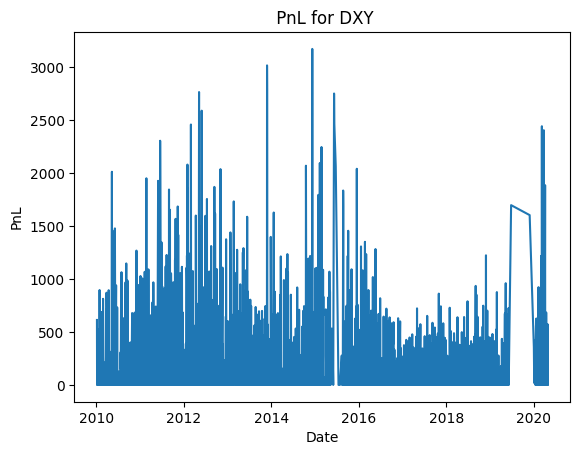

Net Profit: $ 492956.35
Win Rate:  0.96
Loss Rate:  0.0
Risk-Reward Ratio:  nan
Max Drawdown: $ 613.23


In [6]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Amount of initial capital
initial_trade = 20000

# Get stock market data for symbol DXY from start date to end date
stock_data = yf.download("DXY", start="2010-01-01", end="2021-06-23")

# Calculation of daily returns for each day
stock_returns = stock_data['Adj Close'].pct_change()

# Generate buy and sell signals
signals = pd.DataFrame(index=stock_returns.index)
signals['signal'] = 0.0
signals['signal'] = np.where(stock_returns > 0, 1.0, 0.0)
signals['positions'] = signals['signal'].diff()


# Determination of position in the market for each day
df = pd.DataFrame(index=stock_returns.index)
df['signal'] = signals['signal']
df['position'] = signals['positions']
df.fillna(method='ffill', inplace=True)


# Calculation of profit and loss (PnL) and cumulative profit and loss (Cumulative PnL)
df['returns'] = stock_returns

df['PnL'] = df['position'] * df['returns'] * initial_trade

df['Cumulative PnL'] = df['PnL'].cumsum()
print(df['PnL'] )
print(print(df['PnL'] ))


# Cumulative profit and loss chart
plt.plot(df['PnL'])
plt.xlabel('Date')
plt.ylabel('PnL')
plt.title(' PnL for DXY')
plt.show()

# Trading system evaluation function
def evaluate_trading_system(df):
    # Calculation of net profit
    net_profit = df['PnL'].sum()
    # Calculation of win and loss rates
    num_trades = len(df[df['position'] != 0])





    win_trades = len(df[df['PnL'] > 0])
    loss_trades = len(df[df['PnL'] < 0])
    win_rate = win_trades / num_trades
    loss_rate = loss_trades / num_trades

    # Calculation of risk-reward ratio
    avg_win = df[df['PnL'] > 0]['PnL'].mean()
    avg_loss = df[df['PnL'] < 0]['PnL'].mean()


    risk_reward_ratio = abs(avg_win / avg_loss)

    # Calculation of risk-reward ratio
    max_drawdown = abs(df['Cumulative PnL'].min())

    # Print trading system criteria
    print('Net Profit: $', round(net_profit, 2))
    print('Win Rate: ', round(win_rate, 2))
    print('Loss Rate: ', round(loss_rate, 2))
    print('Risk-Reward Ratio: ', round(risk_reward_ratio, 2))
    print('Max Drawdown: $', round(max_drawdown, 2))

# Evaluation of the trading system
evaluate_trading_system(df)

